In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
# Version Information
# tensorflow 2.2.0 , Cudnn7.6.5 and Cuda 10.1 , python 3.8

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.__version__

'2.9.2'

In [4]:
tf.test.is_built_with_cuda()

False

# Load the Dataset

In [6]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 261s 2us/step


In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

# Data Visualization

In [13]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

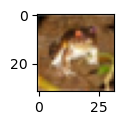

In [14]:
plot_sample(0)

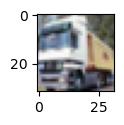

In [15]:
plot_sample(1)

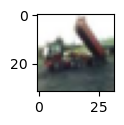

In [16]:
plot_sample(2)

In [17]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

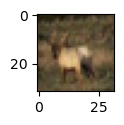

In [18]:
plot_sample(3)

In [19]:
classes[y_train[3][0]]

'deer'

In [20]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [21]:
y_test.shape

(10000, 1)

In [22]:
X_train.shape

(50000, 32, 32, 3)

# Preprocessing: Scale Images

In [23]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [24]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype="float32"
)

y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype="float32"
)

In [25]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [26]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Model Building and Training

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer="SGD",
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

model.fit(X_train_scaled, y_train_categorical, epochs=1)

Metal device set to: Apple M1


2023-01-14 13:00:00.729276: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-14 13:00:00.729603: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-01-14 13:00:02.437410: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-14 13:00:02.594182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 21s 12ms/step - loss: 1.8109 - accuracy: 0.3538


# Let's Make Some Predictions

In [30]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 [==============================] - 2s 7ms/step


3

In [31]:
y_test[0]

array([3], dtype=uint8)

In [32]:
def get_model():
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
    ])

    model.compile(optimizer="SGD",
                  loss = "categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model

# I Have M1 Macbook Air

# Measure Training Time on CPU

In [33]:
%%timeit -n1 -r1

with tf.device("/CPU:0"):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 25s 16ms/step - loss: 1.8107 - accuracy: 0.3547
25.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Measure Training Time on GPU

In [34]:
%%timeit -n1 -r1

with tf.device("/GPU:0"):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

   9/1563 [..............................] - ETA: 20s - loss: 2.3369 - accuracy: 0.1424

2023-01-14 13:06:20.154452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 19s 12ms/step - loss: 1.8136 - accuracy: 0.3541
19.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Lets Run Same Test for 10 Epochs

In [35]:
%%timeit -n1 -r1

with tf.device("/CPU:0"):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.8126 - accuracy: 0.3547
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.6248 - accuracy: 0.4261
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.5413 - accuracy: 0.4563
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4814 - accuracy: 0.4777
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4310 - accuracy: 0.4963
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.3885 - accuracy: 0.5121
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3508 - accuracy: 0.5256
Epoch 8/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3146 - accuracy: 0.5400
Epoch 9/10
1563/1563 [==============================] - 27s 18ms/step - loss: 1.2806 - accuracy: 0.5519
Epoch 10/10
1563/1563 [==============================] - 28s 18m

In [36]:
%%timeit -n1 -r1

with tf.device("/GPU:0"):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
   9/1563 [..............................] - ETA: 20s - loss: 2.3332 - accuracy: 0.1111

2023-01-14 13:14:14.973451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 20s 12ms/step - loss: 1.8168 - accuracy: 0.3514
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6256 - accuracy: 0.4268
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5449 - accuracy: 0.4542
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4844 - accuracy: 0.4747
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4353 - accuracy: 0.4954
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3908 - accuracy: 0.5116
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3538 - accuracy: 0.5258
Epoch 8/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3166 - accuracy: 0.5384
Epoch 9/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2853 - accuracy: 0.5491
Epoch 10/10
1563/1563 [==============================] - 20s 12ms/step - lo